In [ ]:
N_classes = 2
N_epocas = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
            21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
            41,42,43,44,45,46,47,48,49,50]
            

In [ ]:
data = ImageDataGenerator(rescale = 1./255,
                          horizontal_flip = True,
                          rotation_range=5,
                          zoom_range=0.15,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.5,
                          validation_split = 0.20)

traindata = data.flow_from_directory(directory='/content/drive/MyDrive/NEURO_CNN/dataset_geral_2c/',
                                     target_size = (384,384),
                                     class_mode = 'categorical',
                                     batch_size = 16,
                                     shuffle = True,
                                     subset = 'training',
                                     interpolation = 'nearest')

testdata = data.flow_from_directory(directory='/content/drive/MyDrive/NEURO_CNN/dataset_geral_2c/',
                                     target_size = (384,384),
                                     class_mode = 'categorical',
                                     batch_size = 8,
                                     shuffle = True,
                                     subset = 'validation',
                                     interpolation = 'nearest')


Found 3188 images belonging to 2 classes.
Found 796 images belonging to 2 classes.


In [ ]:
print(traindata[0][0]) # Retornará as arrays referentes as amostras


[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.         0.         0.        ]
   [0. 

In [ ]:
print(traindata[0][1]) # Retornará uma array referentes as labels das 2 amostras geradas para cada batch


[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
print(traindata[0][0][0]) # Array referente a primeira amostra
print(traindata[0][1][0]) # Retorna as labels referentes a primeira amostra


[[[0.00543138 0.00543138 0.00543138]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00548381 0.00548381 0.00548381]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00451828 0.00451828 0.00451828]
  [0.00543134 0.00543134 0.00543134]
  [0.00549189 0.00549189 0.00549189]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [ ]:
for i in traindata:
  print(f'Para cada imagem de origem serão geradas {i[0].shape[0]} novas imagens sintéticas')
  print(f'As imagens finais possuirão {i[0].shape[1]}x{i[0].shape[2]} pixels em {i[0].shape[3]} canais de cor')
  break


Para cada imagem de origem serão geradas 16 novas imagens sintéticas
As imagens finais possuirão 384x384 pixels em 3 canais de cor


In [ ]:
METRICS = [keras.metrics.CategoricalAccuracy(name = 'accuracy'),
           keras.metrics.TruePositives(thresholds = 0.50, name = 'tp'),
           keras.metrics.TrueNegatives(thresholds = 0.50, name = 'tn'),
           keras.metrics.FalsePositives(thresholds = 0.50, name = 'fp'),
           keras.metrics.FalseNegatives(thresholds = 0.50, name = 'fn'),
           keras.metrics.PrecisionAtRecall(recall = 0.50, name = 'precision'),
           keras.metrics.SensitivityAtSpecificity(0.50, name = 'sensitivity'),
           keras.metrics.SpecificityAtSensitivity(sensitivity = 0.50,
                                                  name = 'specificity'),
           keras.metrics.Recall(name='recall'),
           tfa.metrics.FBetaScore(num_classes = N_classes,
                                  average = None,
                                  threshold = 0.50,
                                  name = 'FBetaScore')]


In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(weights = 'imagenet',
                               include_top = False,
                               input_shape = (384,384,3))
                                                   
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(rate = 0.50)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(rate = 0.25)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(1024, activation = 'relu')(x)

predictions = Dense(units = N_classes,
                    activation = 'sigmoid')(x)

model = Model(inputs = base_model.input,
              outputs = predictions)

for layer in model.layers:
  layer.trainable = True


219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
opt = Adam(learning_rate=0.0001,
           beta_1=0.9,
           beta_2=0.999,
           epsilon=1e-07,
           amsgrad=False)

model.compile(optimizer = opt,
              loss = keras.losses.categorical_crossentropy,
              metrics = METRICS)


In [ ]:
earlystop = EarlyStopping(monitor='loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          mode = 'min')


In [ ]:
learning_rate = ReduceLROnPlateau(monitor='accuracy',
                                  factor=0.2,
                                  patience=1,
                                  min_lr=0.00001,
                                  verbose=1)


In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 191, 191, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 191, 191, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
tf.keras.backend.clear_session()


In [ ]:
camadas = dict([(layer.name, layer) for layer in model.layers])

#for i in list(camadas):
#  print(i)

print(f'Nº de camadas: {len(camadas)}')


Nº de camadas: 790


In [ ]:
%%time

hist = model.fit(traindata,
                 steps_per_epoch = 100,
                 epochs = 50,
                 validation_data = testdata,
                 validation_steps = 25,
                 callbacks = [learning_rate],
                 verbose = 1)


Epoch 1/50
100/100 [==============================] - 278s 2s/step - loss: 0.3789 - accuracy: 0.8149 - tp: 1302.0000 - tn: 1289.0000 - fp: 299.0000 - fn: 286.0000 - precision: 0.9685 - sensitivity: 0.9811 - specificity: 0.9836 - recall: 0.8199 - FBetaScore: 0.7782 - val_loss: 1.0944 - val_accuracy: 0.7500 - val_tp: 150.0000 - val_tn: 149.0000 - val_fp: 51.0000 - val_fn: 50.0000 - val_precision: 0.9680 - val_sensitivity: 0.9850 - val_specificity: 0.9800 - val_recall: 0.7500 - val_FBetaScore: 0.5917 - lr: 1.0000e-04
Epoch 2/50
100/100 [==============================] - 162s 2s/step - loss: 0.1292 - accuracy: 0.9553 - tp: 1516.0000 - tn: 1515.0000 - fp: 73.0000 - fn: 72.0000 - precision: 0.9978 - sensitivity: 0.9987 - specificity: 0.9987 - recall: 0.9547 - FBetaScore: 0.9468 - val_loss: 0.2328 - val_accuracy: 0.9200 - val_tp: 184.0000 - val_tn: 184.0000 - val_fp: 16.0000 - val_fn: 16.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.9200 - va

In [ ]:
print(hist.history)


{'loss': [0.37886470556259155, 0.1292181760072708, 0.09160107374191284, 0.06549067795276642, 0.03592707961797714, 0.07033830136060715, 0.021376466378569603, 0.015792109072208405, 0.012313062325119972, 0.013942165300250053, 0.012086492031812668, 0.0058361683040857315, 0.01010435726493597, 0.0048564765602350235, 0.0042582727037370205, 0.0014521144330501556, 0.001491328002884984, 0.0026181854773312807, 0.007181758526712656, 0.002245366107672453, 0.0018227146938443184, 0.002130078384652734, 0.0007808822556398809, 0.0017185787437483668, 0.0009350093314424157, 0.002344546839594841, 0.003740019863471389, 0.001978543121367693, 0.0016751423245295882, 0.000910193775780499, 0.0004260932910256088, 0.0033163803163915873, 0.0013635894283652306, 0.0029343212954699993, 0.004969677422195673, 0.00023921988031361252, 0.007357143796980381, 0.0015915107214823365, 0.0004885433008894324, 0.00018041582370642573, 0.005653652362525463, 0.0006153576541692019, 0.00112735026050359, 0.00031098799081519246, 0.005465

In [ ]:
# Métricas retornadas durante o treinamento
acc = hist.history['accuracy']
loss =  hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv = hist.history['val_tn']
pre = hist.history['precision']
rec = hist.history['recall']
lr = hist.history['lr']


In [ ]:
# Métricas retornadas pela última época de processamento
fb = hist.history['FBetaScore'][-1]
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history['recall'][-1]
RECV = hist.history['val_recall'][-1]
LR = hist.history['lr'][-1]


In [ ]:
# Média das métricas retornadas nas últimas 10 épocas de processameto
accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])


In [ ]:
# Métricas calculadas como média para todas as épocas de processamento
acc_media_total = round(mean(acc[:-1]),2)
media_tp_total = round(mean(tp[:-1]),2)
media_fp_total = round(mean(fp[:-1]),2)
media_tn_total = round(mean(tn[:-1]),2)
media_fn_total = round(mean(fn[:-1]),2)


In [ ]:
# Métricas processadas após o final do treinamento
TPR = TP /(TP + FN) # Sensitivity, hit rate, recall, or true positive rate
TNR = TN /(TN + FP) # Specificity or true negative rate
PPV = TP /(TP + FP) # Precision or positive predictive value
NPV = TN /(TN + FN) # Negative predictive value
FPR = FP /(FP + TN) # Fall out or false positive rate
FNR = FN /(TP + FN) # False negative rate
FDR = FP /(TP + FP) # False omission rate / False discovery rate

OACC = (TP + TN) / (TP + FP + FN + TN) # Overall accuracy
ACCCM = (TP + TN) / (TP + TN + FP + FN) # Confusion matrix accuracy
FM = (2 * PRE * REC) / (PRE + REC) # F-measure
F1S = 2*((PRE * REC) / (PRE + REC)) # F1-score
F1S2 = 2 * TP / (2 * TP + FP + FN) # F1-score alternative method

MCC = (TP * TN - FP * FN) / (sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))) # Matthews Correlation Coeficient


In [ ]:
print(f'Verdadeiros Positivos (Todas as épocas de processamento): \n{tp}')
print(f'Falsos Positivos (Todas as épocas de processamento): \n{fp}')
print(f'Verdadeiros Negativos (Todas as épocas de processamento): \n{tn}')
print(f'Falsos Negativos (Todas as épocas de processamento): \n{fn}')


Verdadeiros Positivos (Todas as épocas de processamento): 
[1302.0, 1516.0, 1551.0, 1567.0, 1578.0, 1556.0, 1591.0, 1581.0, 1580.0, 1591.0, 1582.0, 1585.0, 1595.0, 1585.0, 1585.0, 1588.0, 1588.0, 1598.0, 1584.0, 1587.0, 1599.0, 1587.0, 1588.0, 1586.0, 1587.0, 1598.0, 1598.0, 1599.0, 1587.0, 1599.0, 1588.0, 1586.0, 1588.0, 1585.0, 1596.0, 1588.0, 1598.0, 1587.0, 1600.0, 1588.0, 1586.0, 1600.0, 1587.0, 1600.0, 1598.0, 1587.0, 1586.0, 1600.0, 1600.0, 1599.0]
Falsos Positivos (Todas as épocas de processamento): 
[299.0, 73.0, 50.0, 33.0, 22.0, 32.0, 9.0, 7.0, 7.0, 9.0, 6.0, 3.0, 5.0, 2.0, 3.0, 0.0, 0.0, 2.0, 4.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 2.0, 4.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0]
Verdadeiros Negativos (Todas as épocas de processamento): 
[1289.0, 1515.0, 1550.0, 1567.0, 1578.0, 1556.0, 1591.0, 1581.0, 1581.0, 1591.0, 1582.0, 1585.0, 1595.0, 1586.0, 1585.0, 1588.0, 1588.0, 1598.0, 1584.0, 1587.0, 1599.0, 

In [ ]:
print("Matriz de Confusão (Todas as Épocas de Processamento)")
print(f"[{tp}] [{fp}]")
print(f"[{fn}] [{tn}]")

print(f'Acurácia da Matriz de Confusão: {round(acc_media_total, 2)*100-2}%')


Matriz de Confusão (Todas as Épocas de Processamento)
[[1302.0, 1516.0, 1551.0, 1567.0, 1578.0, 1556.0, 1591.0, 1581.0, 1580.0, 1591.0, 1582.0, 1585.0, 1595.0, 1585.0, 1585.0, 1588.0, 1588.0, 1598.0, 1584.0, 1587.0, 1599.0, 1587.0, 1588.0, 1586.0, 1587.0, 1598.0, 1598.0, 1599.0, 1587.0, 1599.0, 1588.0, 1586.0, 1588.0, 1585.0, 1596.0, 1588.0, 1598.0, 1587.0, 1600.0, 1588.0, 1586.0, 1600.0, 1587.0, 1600.0, 1598.0, 1587.0, 1586.0, 1600.0, 1600.0, 1599.0]] [[299.0, 73.0, 50.0, 33.0, 22.0, 32.0, 9.0, 7.0, 7.0, 9.0, 6.0, 3.0, 5.0, 2.0, 3.0, 0.0, 0.0, 2.0, 4.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 2.0, 4.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0]]
[[286.0, 72.0, 49.0, 33.0, 22.0, 32.0, 9.0, 7.0, 8.0, 9.0, 6.0, 3.0, 5.0, 3.0, 3.0, 0.0, 0.0, 2.0, 4.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 4.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0]] [[1289.0, 1515.0, 1550.

In [ ]:
print(f'Verdadeiros Positivos (Média de todas as épocas de processamento): \n{media_tp_total}')
print(f'Falsos Positivos (Média de todas as épocas de processamento): \n{media_fp_total}')
print(f'Verdadeiros Negativos (Média de todas as épocas de processamento): \n{media_tn_total}')
print(f'Falsos Negativos (Média de todas as épocas de processamento): \n{media_fn_total}')


Verdadeiros Positivos (Média de todas as épocas de processamento): 
1580.94
Falsos Positivos (Média de todas as épocas de processamento): 
12.2
Verdadeiros Negativos (Média de todas as épocas de processamento): 
1580.69
Falsos Negativos (Média de todas as épocas de processamento): 
11.96


In [ ]:
print("Matriz de Confusão (Média de todas as épocas de Processamento)")
print(f"[{media_tp_total}] [{media_fp_total}]")
print(f"[{media_fn_total}] [{media_tn_total}]")

print(f'Acurácia da Matriz de Confusão: {round(acc_media_total, 2)*100-2}%')


Matriz de Confusão (Média de todas as épocas de Processamento)
[1580.94] [12.2]
[11.96] [1580.69]
Acurácia da Matriz de Confusão: 97.0%


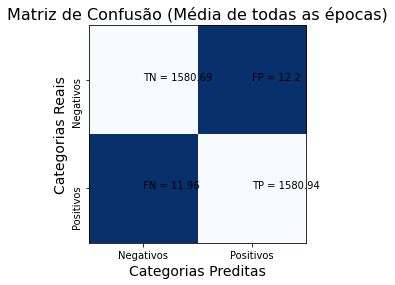

In [ ]:
data = [[media_tn_total, media_fp_total],[media_fn_total, media_tp_total]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão (Média de todas as épocas)', fontsize=16)
plt.ylabel('Categorias Reais', fontsize=14)
plt.xlabel('Categorias Preditas', fontsize=14)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


In [ ]:
print(f'Verdadeiros Positivos (Média das últimas 10 épocas de processameto): \n{tpU10}')
print(f'Falsos Positivos (Média das últimas 10 épocas de processameto): \n{fpU10}')
print(f'Verdadeiros Negativos (Média das últimas 10 épocas de processameto): \n{tnU10}')
print(f'Falsos Negativos (Média das últimas 10 épocas de processameto): \n{fnU10}')


Verdadeiros Positivos (Média das últimas 10 épocas de processameto): 
1586.0
Falsos Positivos (Média das últimas 10 épocas de processameto): 
2.0
Verdadeiros Negativos (Média das últimas 10 épocas de processameto): 
1586.0
Falsos Negativos (Média das últimas 10 épocas de processameto): 
2.0


In [ ]:
print("Matriz de Confusão (Média das últimas 10 épocas de Processamento)")
print(f"[{tpU10}] [{fpU10}]")
print(f"[{fnU10}] [{tnU10}]")

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


Matriz de Confusão (Média das últimas 10 épocas de Processamento)
[1586.0] [2.0]
[2.0] [1586.0]
Acurácia da Matriz de Confusão: 98.0%


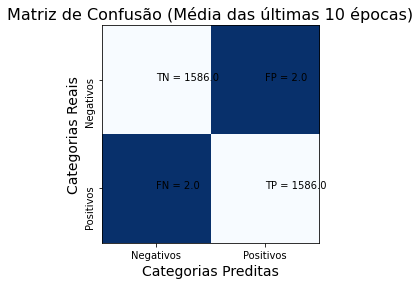

In [ ]:
data = [[tnU10, fpU10],[fnU10, tpU10]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão (Média das últimas 10 épocas)', fontsize=16)
plt.ylabel('Categorias Reais', fontsize=14)
plt.xlabel('Categorias Preditas', fontsize=14)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


In [ ]:
print(f'Verdadeiros Positivos (Apenas última época de processameto): \n{TP}')
print(f'Falsos Positivos (Apenas última época de processameto): \n{FP}')
print(f'Verdadeiros Negativos (Apenas última época de processameto): \n{TN}')
print(f'Falsos Negativos (Apenas última época de processameto): \n{FN}')


Verdadeiros Positivos (Apenas última época de processameto): 
1599.0
Falsos Positivos (Apenas última época de processameto): 
1.0
Verdadeiros Negativos (Apenas última época de processameto): 
1599.0
Falsos Negativos (Apenas última época de processameto): 
1.0


In [ ]:
print("Matriz de Confusão (Última época de processamento)")
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print(f'Acurácia da Matriz de Confusão: {round(acc[-1], 2)*100-2}%')


Matriz de Confusão (Última época de processamento)
[1599.0] [1.0]
[1.0] [1599.0]
Acurácia da Matriz de Confusão: 98.0%


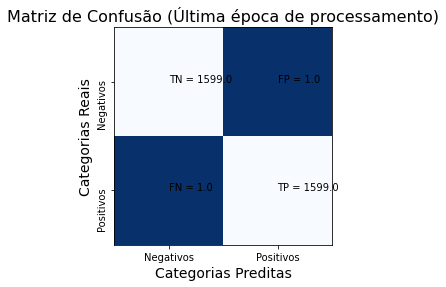

In [ ]:
data = [[TN, FP],[FN, TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão (Última época de processamento)', fontsize=16)
plt.ylabel('Categorias Reais', fontsize=14)
plt.xlabel('Categorias Preditas', fontsize=14)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


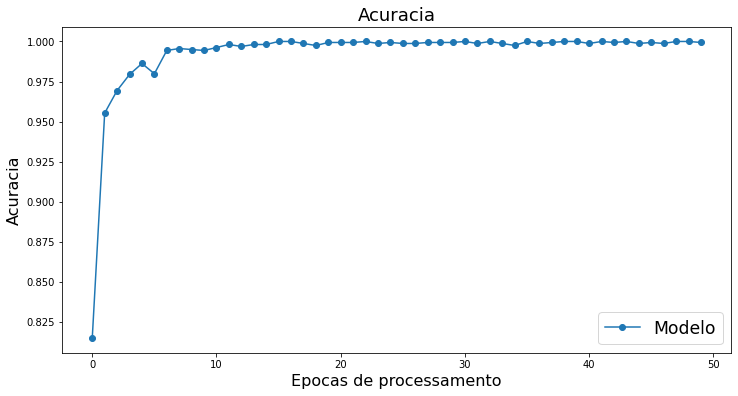

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(acc, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Acuracia', fontsize=16)
plt.title('Acuracia', fontsize=18)
plt.show()

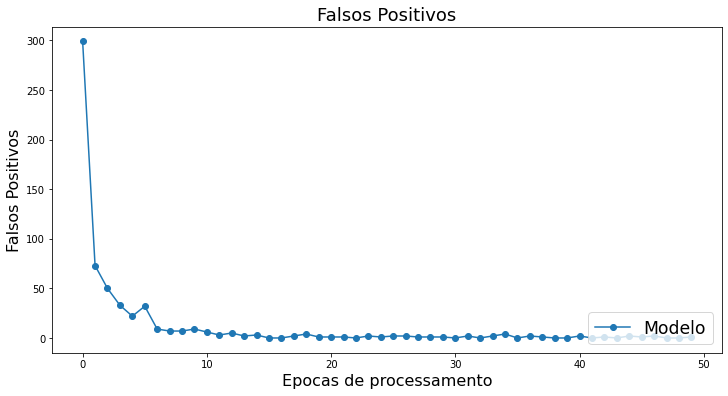

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(fp, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Falsos Positivos', fontsize=16)
plt.title('Falsos Positivos', fontsize=18)
plt.show()

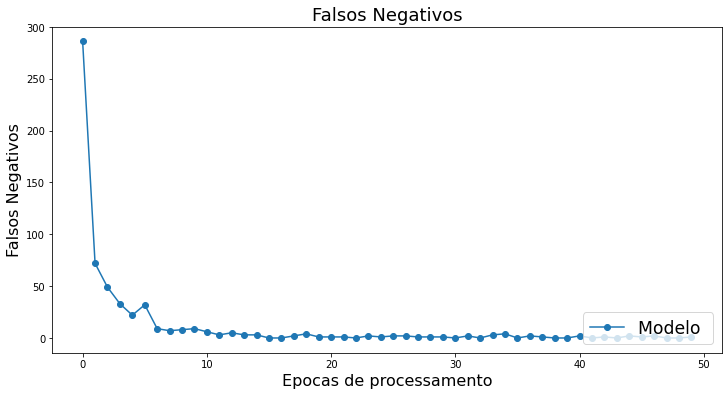

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(fn, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Falsos Negativos', fontsize=16)
plt.title('Falsos Negativos', fontsize=18)
plt.show()

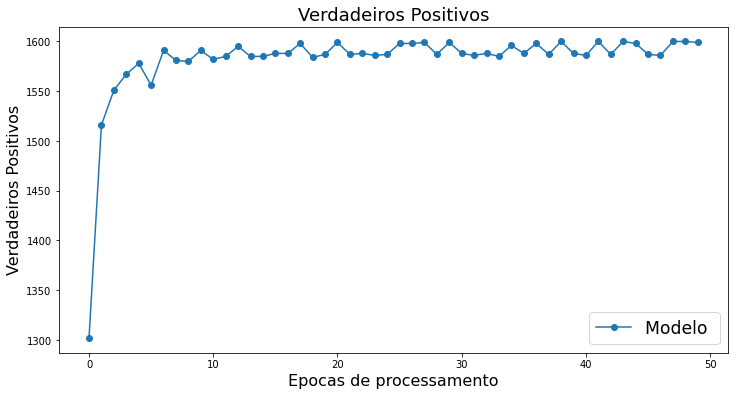

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(tp, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Verdadeiros Positivos', fontsize=16)
plt.title('Verdadeiros Positivos', fontsize=18)
plt.show()

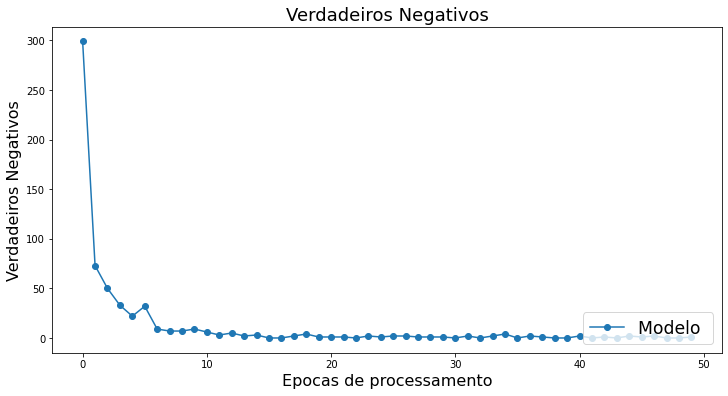

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(fp, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Verdadeiros Negativos', fontsize=16)
plt.title('Verdadeiros Negativos', fontsize=18)
plt.show()

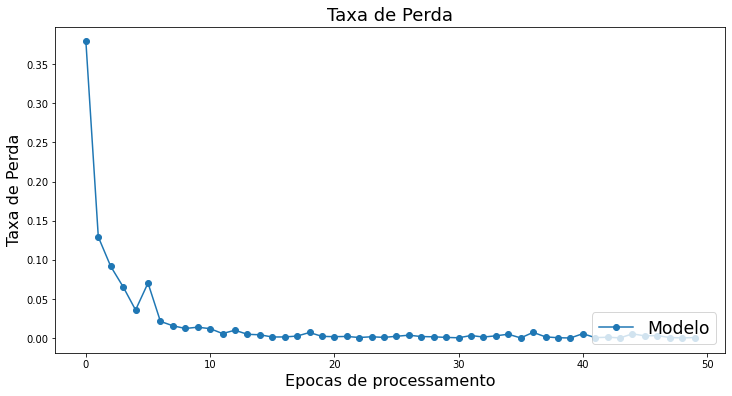

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(loss, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Taxa de Perda', fontsize=16)
plt.title('Taxa de Perda', fontsize=18)
plt.show()

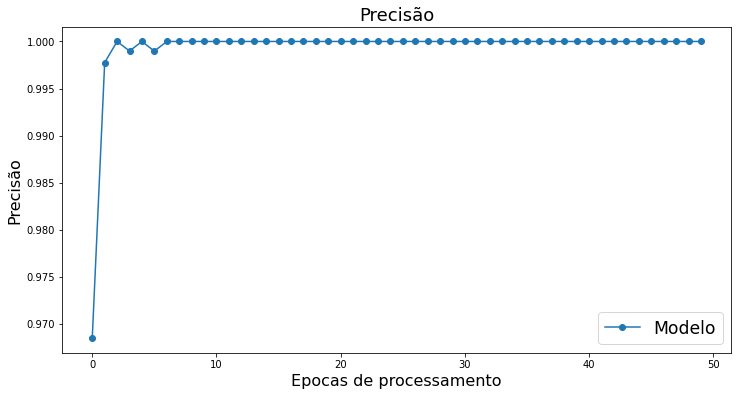

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(pre, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Precisão', fontsize=16)
plt.title('Precisão', fontsize=18)
plt.show()

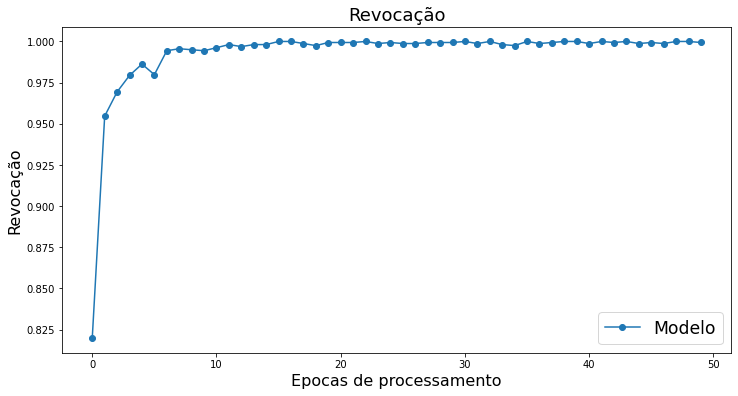

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(rec, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Revocação', fontsize=16)
plt.title('Revocação', fontsize=18)
plt.show()

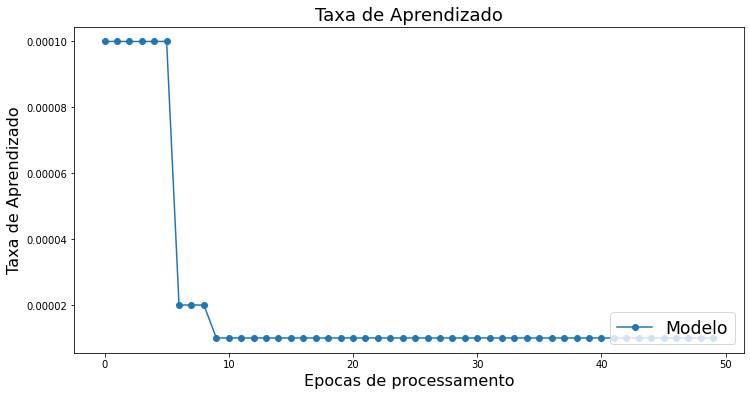

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(lr, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Taxa de Aprendizado', fontsize=16)
plt.title('Taxa de Aprendizado', fontsize=18)
plt.show()

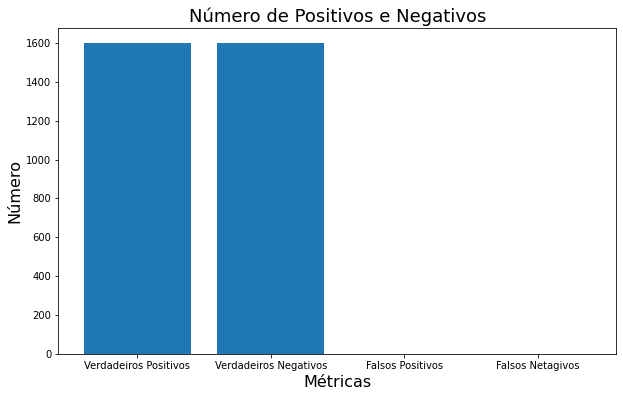

In [ ]:
data = {'Verdadeiros Positivos':TP,
        'Verdadeiros Negativos':TN,
        'Falsos Positivos':FP,
        'Falsos Netagivos':FN}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Número", fontsize=16)
plt.title('Número de Positivos e Negativos', fontsize=18)
plt.show()


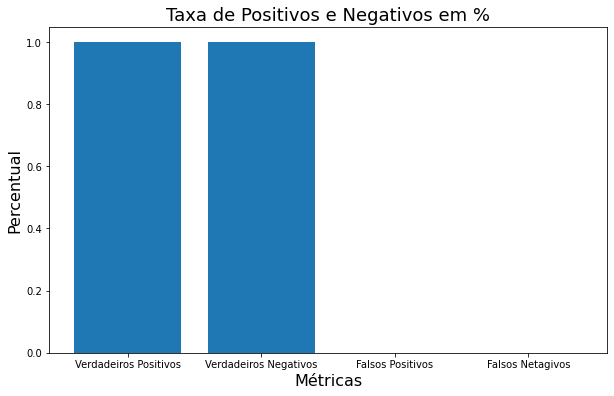

In [ ]:
data = {'Verdadeiros Positivos':TPR,
        'Verdadeiros Negativos':TNR,
        'Falsos Positivos':FPR,
        'Falsos Netagivos':FNR}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Taxa de Positivos e Negativos em %', fontsize=18)
plt.show()


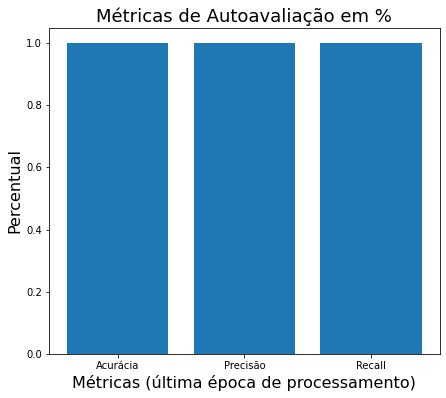

In [ ]:
data = {'Acurácia':ACC,
        'Precisão':PRE,
        'Recall':REC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas (última época de processamento)", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Métricas de Autoavaliação em %', fontsize=18)
plt.show()


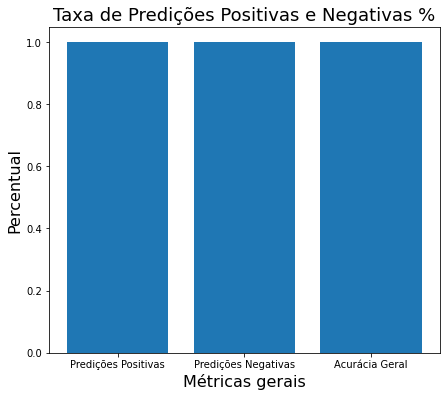

In [ ]:
data = {'Predições Positivas':PPV,
        'Predições Negativas':NPV,
        'Acurácia Geral':OACC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas gerais", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Taxa de Predições Positivas e Negativas %', fontsize=18)
plt.show()


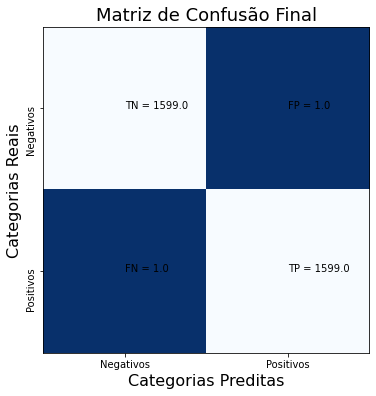

In [ ]:
data = [[TN, FP],[FN,TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão Final', fontsize=18)
plt.ylabel('Categorias Reais', fontsize=16)
plt.xlabel('Categorias Preditas', fontsize=16)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


In [ ]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]


In [ ]:
acc_final = hist.history['accuracy'][-1] * 100


In [ ]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Coeficiente de Correlação de Matthews: {round(MCC, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Taxa de Omissão Falsa: {round(FDR, 2)*100}%') # Percentual do número de amostras ignoradas no teste


RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)
---------------------------------------
Acuracia Final: 97.94%
Acurácia Geral: 98.0%
Acurácia (Média U10): 98.0%
Acurácia (Treinamento): 98.0%
Acurácia (Validação): 98.0%
Taxa de Perda: 0.0%
Taxa de Perda (Validação): 0.04%
Precisão: 100.0%
Precisão (Validação): 98.0%
Recall: 100.0%
Recall (Validação): 98.0%
F1 Score: 100.0%
F-Measure: 100.0%
F1 Score (TP, FP, TN, FN): 98.0%
Taxa de Aprendizado: 9.999999747378752e-06
Sensibilidade: 98.0%
Especificidade: 98.0%
Acurácia da Matriz de Confusão: 98.0%
Coeficiente de Correlação de Matthews: 98.0%
Taxa de Verdadeiros Positivos: 100.0%
Taxa de Verdadeiros Negativos: 100.0%
Taxa de Falsos Positivos: 0.0%
Taxa de Falsos Negativos: 0.0%
Taxa de Omissão Falsa: 0.0%


In [ ]:
print(f'F-Beta: {fb}')


F-Beta: [0.9990431 0.999536 ]


In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_TM2C_weights.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_TM2C.h5')


# Classificador Base - 2 Classes - Normal ou Patológico

In [ ]:
N_classes = 2
N_epocas = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
            21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,
            41,42,43,44,45,46,47,48,49,50]
            

In [ ]:
data = ImageDataGenerator(rescale = 1./255,
                          horizontal_flip = True,
                          rotation_range=5,
                          zoom_range=0.15,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.5,
                          validation_split = 0.20)

traindata = data.flow_from_directory(directory='/content/drive/MyDrive/NEURO_CNN/dataset_geral_2c/',
                                     target_size = (384,384),
                                     class_mode = 'categorical',
                                     batch_size = 16,
                                     shuffle = True,
                                     subset = 'training',
                                     interpolation = 'nearest')

testdata = data.flow_from_directory(directory='/content/drive/MyDrive/NEURO_CNN/dataset_geral_2c/',
                                     target_size = (384,384),
                                     class_mode = 'categorical',
                                     batch_size = 8,
                                     shuffle = True,
                                     subset = 'validation',
                                     interpolation = 'nearest')


Found 3188 images belonging to 2 classes.
Found 796 images belonging to 2 classes.


In [ ]:
print(traindata[0][0]) # Retornará as arrays referentes as amostras


[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]]

  [[0.         0.         0.        ]
   [0. 

In [ ]:
print(traindata[0][1]) # Retornará uma array referentes as labels das 2 amostras geradas para cada batch


[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
print(traindata[0][0][0]) # Array referente a primeira amostra
print(traindata[0][1][0]) # Retorna as labels referentes a primeira amostra


[[[0.00543138 0.00543138 0.00543138]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00548381 0.00548381 0.00548381]
  [0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.00451828 0.00451828 0.00451828]
  [0.00543134 0.00543134 0.00543134]
  [0.00549189 0.00549189 0.00549189]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


In [ ]:
for i in traindata:
  print(f'Para cada imagem de origem serão geradas {i[0].shape[0]} novas imagens sintéticas')
  print(f'As imagens finais possuirão {i[0].shape[1]}x{i[0].shape[2]} pixels em {i[0].shape[3]} canais de cor')
  break


Para cada imagem de origem serão geradas 16 novas imagens sintéticas
As imagens finais possuirão 384x384 pixels em 3 canais de cor


In [ ]:
METRICS = [keras.metrics.CategoricalAccuracy(name = 'accuracy'),
           keras.metrics.TruePositives(thresholds = 0.50, name = 'tp'),
           keras.metrics.TrueNegatives(thresholds = 0.50, name = 'tn'),
           keras.metrics.FalsePositives(thresholds = 0.50, name = 'fp'),
           keras.metrics.FalseNegatives(thresholds = 0.50, name = 'fn'),
           keras.metrics.PrecisionAtRecall(recall = 0.50, name = 'precision'),
           keras.metrics.SensitivityAtSpecificity(0.50, name = 'sensitivity'),
           keras.metrics.SpecificityAtSensitivity(sensitivity = 0.50,
                                                  name = 'specificity'),
           keras.metrics.Recall(name='recall'),
           tfa.metrics.FBetaScore(num_classes = N_classes,
                                  average = None,
                                  threshold = 0.50,
                                  name = 'FBetaScore')]


In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(weights = 'imagenet',
                               include_top = False,
                               input_shape = (384,384,3))
                                                   
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(rate = 0.50)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(rate = 0.25)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(1024, activation = 'relu')(x)

predictions = Dense(units = N_classes,
                    activation = 'sigmoid')(x)

model = Model(inputs = base_model.input,
              outputs = predictions)

for layer in model.layers:
  layer.trainable = True


219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
opt = Adam(learning_rate=0.0001,
           beta_1=0.9,
           beta_2=0.999,
           epsilon=1e-07,
           amsgrad=False)

model.compile(optimizer = opt,
              loss = keras.losses.categorical_crossentropy,
              metrics = METRICS)


In [ ]:
earlystop = EarlyStopping(monitor='loss',
                          min_delta = 0,
                          patience = 10,
                          verbose = 1,
                          mode = 'min')


In [ ]:
learning_rate = ReduceLROnPlateau(monitor='accuracy',
                                  factor=0.2,
                                  patience=1,
                                  min_lr=0.00001,
                                  verbose=1)


In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 191, 191, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 191, 191, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
tf.keras.backend.clear_session()


In [ ]:
camadas = dict([(layer.name, layer) for layer in model.layers])

#for i in list(camadas):
#  print(i)

print(f'Nº de camadas: {len(camadas)}')


Nº de camadas: 790


In [ ]:
%%time

hist = model.fit(traindata,
                 steps_per_epoch = 100,
                 epochs = 50,
                 validation_data = testdata,
                 validation_steps = 25,
                 callbacks = [learning_rate],
                 verbose = 1)


Epoch 1/50
100/100 [==============================] - 278s 2s/step - loss: 0.3789 - accuracy: 0.8149 - tp: 1302.0000 - tn: 1289.0000 - fp: 299.0000 - fn: 286.0000 - precision: 0.9685 - sensitivity: 0.9811 - specificity: 0.9836 - recall: 0.8199 - FBetaScore: 0.7782 - val_loss: 1.0944 - val_accuracy: 0.7500 - val_tp: 150.0000 - val_tn: 149.0000 - val_fp: 51.0000 - val_fn: 50.0000 - val_precision: 0.9680 - val_sensitivity: 0.9850 - val_specificity: 0.9800 - val_recall: 0.7500 - val_FBetaScore: 0.5917 - lr: 1.0000e-04
Epoch 2/50
100/100 [==============================] - 162s 2s/step - loss: 0.1292 - accuracy: 0.9553 - tp: 1516.0000 - tn: 1515.0000 - fp: 73.0000 - fn: 72.0000 - precision: 0.9978 - sensitivity: 0.9987 - specificity: 0.9987 - recall: 0.9547 - FBetaScore: 0.9468 - val_loss: 0.2328 - val_accuracy: 0.9200 - val_tp: 184.0000 - val_tn: 184.0000 - val_fp: 16.0000 - val_fn: 16.0000 - val_precision: 1.0000 - val_sensitivity: 1.0000 - val_specificity: 1.0000 - val_recall: 0.9200 - va

In [ ]:
print(hist.history)


{'loss': [0.37886470556259155, 0.1292181760072708, 0.09160107374191284, 0.06549067795276642, 0.03592707961797714, 0.07033830136060715, 0.021376466378569603, 0.015792109072208405, 0.012313062325119972, 0.013942165300250053, 0.012086492031812668, 0.0058361683040857315, 0.01010435726493597, 0.0048564765602350235, 0.0042582727037370205, 0.0014521144330501556, 0.001491328002884984, 0.0026181854773312807, 0.007181758526712656, 0.002245366107672453, 0.0018227146938443184, 0.002130078384652734, 0.0007808822556398809, 0.0017185787437483668, 0.0009350093314424157, 0.002344546839594841, 0.003740019863471389, 0.001978543121367693, 0.0016751423245295882, 0.000910193775780499, 0.0004260932910256088, 0.0033163803163915873, 0.0013635894283652306, 0.0029343212954699993, 0.004969677422195673, 0.00023921988031361252, 0.007357143796980381, 0.0015915107214823365, 0.0004885433008894324, 0.00018041582370642573, 0.005653652362525463, 0.0006153576541692019, 0.00112735026050359, 0.00031098799081519246, 0.005465

In [ ]:
# Métricas retornadas durante o treinamento
acc = hist.history['accuracy']
loss =  hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv = hist.history['val_tn']
pre = hist.history['precision']
rec = hist.history['recall']
lr = hist.history['lr']


In [ ]:
# Métricas retornadas pela última época de processamento
fb = hist.history['FBetaScore'][-1]
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history['recall'][-1]
RECV = hist.history['val_recall'][-1]
LR = hist.history['lr'][-1]


In [ ]:
# Média das métricas retornadas nas últimas 10 épocas de processameto
accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])


In [ ]:
# Métricas calculadas como média para todas as épocas de processamento
acc_media_total = round(mean(acc[:-1]),2)
media_tp_total = round(mean(tp[:-1]),2)
media_fp_total = round(mean(fp[:-1]),2)
media_tn_total = round(mean(tn[:-1]),2)
media_fn_total = round(mean(fn[:-1]),2)


In [ ]:
# Métricas processadas após o final do treinamento
TPR = TP /(TP + FN) # Sensitivity, hit rate, recall, or true positive rate
TNR = TN /(TN + FP) # Specificity or true negative rate
PPV = TP /(TP + FP) # Precision or positive predictive value
NPV = TN /(TN + FN) # Negative predictive value
FPR = FP /(FP + TN) # Fall out or false positive rate
FNR = FN /(TP + FN) # False negative rate
FDR = FP /(TP + FP) # False omission rate / False discovery rate

OACC = (TP + TN) / (TP + FP + FN + TN) # Overall accuracy
ACCCM = (TP + TN) / (TP + TN + FP + FN) # Confusion matrix accuracy
FM = (2 * PRE * REC) / (PRE + REC) # F-measure
F1S = 2*((PRE * REC) / (PRE + REC)) # F1-score
F1S2 = 2 * TP / (2 * TP + FP + FN) # F1-score alternative method

MCC = (TP * TN - FP * FN) / (sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))) # Matthews Correlation Coeficient


In [ ]:
print(f'Verdadeiros Positivos (Todas as épocas de processamento): \n{tp}')
print(f'Falsos Positivos (Todas as épocas de processamento): \n{fp}')
print(f'Verdadeiros Negativos (Todas as épocas de processamento): \n{tn}')
print(f'Falsos Negativos (Todas as épocas de processamento): \n{fn}')


Verdadeiros Positivos (Todas as épocas de processamento): 
[1302.0, 1516.0, 1551.0, 1567.0, 1578.0, 1556.0, 1591.0, 1581.0, 1580.0, 1591.0, 1582.0, 1585.0, 1595.0, 1585.0, 1585.0, 1588.0, 1588.0, 1598.0, 1584.0, 1587.0, 1599.0, 1587.0, 1588.0, 1586.0, 1587.0, 1598.0, 1598.0, 1599.0, 1587.0, 1599.0, 1588.0, 1586.0, 1588.0, 1585.0, 1596.0, 1588.0, 1598.0, 1587.0, 1600.0, 1588.0, 1586.0, 1600.0, 1587.0, 1600.0, 1598.0, 1587.0, 1586.0, 1600.0, 1600.0, 1599.0]
Falsos Positivos (Todas as épocas de processamento): 
[299.0, 73.0, 50.0, 33.0, 22.0, 32.0, 9.0, 7.0, 7.0, 9.0, 6.0, 3.0, 5.0, 2.0, 3.0, 0.0, 0.0, 2.0, 4.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 2.0, 4.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0]
Verdadeiros Negativos (Todas as épocas de processamento): 
[1289.0, 1515.0, 1550.0, 1567.0, 1578.0, 1556.0, 1591.0, 1581.0, 1581.0, 1591.0, 1582.0, 1585.0, 1595.0, 1586.0, 1585.0, 1588.0, 1588.0, 1598.0, 1584.0, 1587.0, 1599.0, 

In [ ]:
print("Matriz de Confusão (Todas as Épocas de Processamento)")
print(f"[{tp}] [{fp}]")
print(f"[{fn}] [{tn}]")

print(f'Acurácia da Matriz de Confusão: {round(acc_media_total, 2)*100-2}%')


Matriz de Confusão (Todas as Épocas de Processamento)
[[1302.0, 1516.0, 1551.0, 1567.0, 1578.0, 1556.0, 1591.0, 1581.0, 1580.0, 1591.0, 1582.0, 1585.0, 1595.0, 1585.0, 1585.0, 1588.0, 1588.0, 1598.0, 1584.0, 1587.0, 1599.0, 1587.0, 1588.0, 1586.0, 1587.0, 1598.0, 1598.0, 1599.0, 1587.0, 1599.0, 1588.0, 1586.0, 1588.0, 1585.0, 1596.0, 1588.0, 1598.0, 1587.0, 1600.0, 1588.0, 1586.0, 1600.0, 1587.0, 1600.0, 1598.0, 1587.0, 1586.0, 1600.0, 1600.0, 1599.0]] [[299.0, 73.0, 50.0, 33.0, 22.0, 32.0, 9.0, 7.0, 7.0, 9.0, 6.0, 3.0, 5.0, 2.0, 3.0, 0.0, 0.0, 2.0, 4.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 2.0, 4.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0]]
[[286.0, 72.0, 49.0, 33.0, 22.0, 32.0, 9.0, 7.0, 8.0, 9.0, 6.0, 3.0, 5.0, 3.0, 3.0, 0.0, 0.0, 2.0, 4.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 4.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0]] [[1289.0, 1515.0, 1550.

In [ ]:
print(f'Verdadeiros Positivos (Média de todas as épocas de processamento): \n{media_tp_total}')
print(f'Falsos Positivos (Média de todas as épocas de processamento): \n{media_fp_total}')
print(f'Verdadeiros Negativos (Média de todas as épocas de processamento): \n{media_tn_total}')
print(f'Falsos Negativos (Média de todas as épocas de processamento): \n{media_fn_total}')


Verdadeiros Positivos (Média de todas as épocas de processamento): 
1580.94
Falsos Positivos (Média de todas as épocas de processamento): 
12.2
Verdadeiros Negativos (Média de todas as épocas de processamento): 
1580.69
Falsos Negativos (Média de todas as épocas de processamento): 
11.96


In [ ]:
print("Matriz de Confusão (Média de todas as épocas de Processamento)")
print(f"[{media_tp_total}] [{media_fp_total}]")
print(f"[{media_fn_total}] [{media_tn_total}]")

print(f'Acurácia da Matriz de Confusão: {round(acc_media_total, 2)*100-2}%')


Matriz de Confusão (Média de todas as épocas de Processamento)
[1580.94] [12.2]
[11.96] [1580.69]
Acurácia da Matriz de Confusão: 97.0%


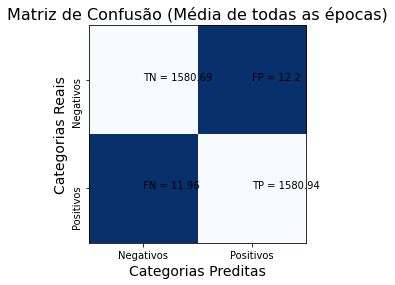

In [ ]:
data = [[media_tn_total, media_fp_total],[media_fn_total, media_tp_total]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão (Média de todas as épocas)', fontsize=16)
plt.ylabel('Categorias Reais', fontsize=14)
plt.xlabel('Categorias Preditas', fontsize=14)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


In [ ]:
print(f'Verdadeiros Positivos (Média das últimas 10 épocas de processameto): \n{tpU10}')
print(f'Falsos Positivos (Média das últimas 10 épocas de processameto): \n{fpU10}')
print(f'Verdadeiros Negativos (Média das últimas 10 épocas de processameto): \n{tnU10}')
print(f'Falsos Negativos (Média das últimas 10 épocas de processameto): \n{fnU10}')


Verdadeiros Positivos (Média das últimas 10 épocas de processameto): 
1586.0
Falsos Positivos (Média das últimas 10 épocas de processameto): 
2.0
Verdadeiros Negativos (Média das últimas 10 épocas de processameto): 
1586.0
Falsos Negativos (Média das últimas 10 épocas de processameto): 
2.0


In [ ]:
print("Matriz de Confusão (Média das últimas 10 épocas de Processamento)")
print(f"[{tpU10}] [{fpU10}]")
print(f"[{fnU10}] [{tnU10}]")

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')


Matriz de Confusão (Média das últimas 10 épocas de Processamento)
[1586.0] [2.0]
[2.0] [1586.0]
Acurácia da Matriz de Confusão: 98.0%


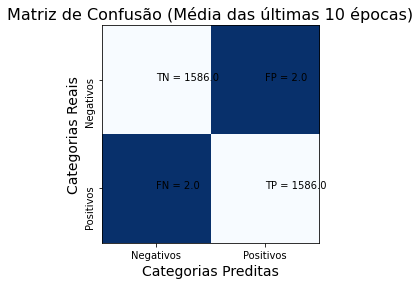

In [ ]:
data = [[tnU10, fpU10],[fnU10, tpU10]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão (Média das últimas 10 épocas)', fontsize=16)
plt.ylabel('Categorias Reais', fontsize=14)
plt.xlabel('Categorias Preditas', fontsize=14)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


In [ ]:
print(f'Verdadeiros Positivos (Apenas última época de processameto): \n{TP}')
print(f'Falsos Positivos (Apenas última época de processameto): \n{FP}')
print(f'Verdadeiros Negativos (Apenas última época de processameto): \n{TN}')
print(f'Falsos Negativos (Apenas última época de processameto): \n{FN}')


Verdadeiros Positivos (Apenas última época de processameto): 
1599.0
Falsos Positivos (Apenas última época de processameto): 
1.0
Verdadeiros Negativos (Apenas última época de processameto): 
1599.0
Falsos Negativos (Apenas última época de processameto): 
1.0


In [ ]:
print("Matriz de Confusão (Última época de processamento)")
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")

print(f'Acurácia da Matriz de Confusão: {round(acc[-1], 2)*100-2}%')


Matriz de Confusão (Última época de processamento)
[1599.0] [1.0]
[1.0] [1599.0]
Acurácia da Matriz de Confusão: 98.0%


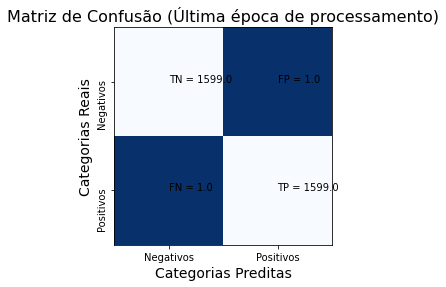

In [ ]:
data = [[TN, FP],[FN, TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão (Última época de processamento)', fontsize=16)
plt.ylabel('Categorias Reais', fontsize=14)
plt.xlabel('Categorias Preditas', fontsize=14)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


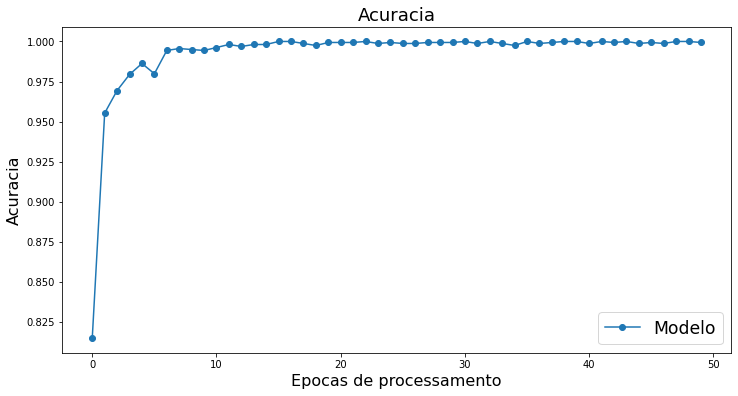

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(acc, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Acuracia', fontsize=16)
plt.title('Acuracia', fontsize=18)
plt.show()

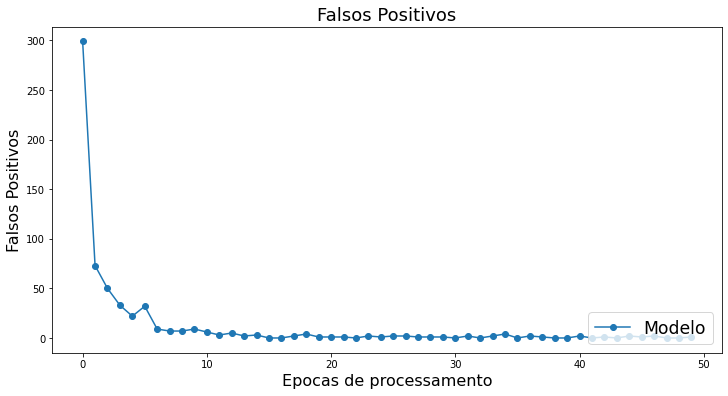

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(fp, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Falsos Positivos', fontsize=16)
plt.title('Falsos Positivos', fontsize=18)
plt.show()

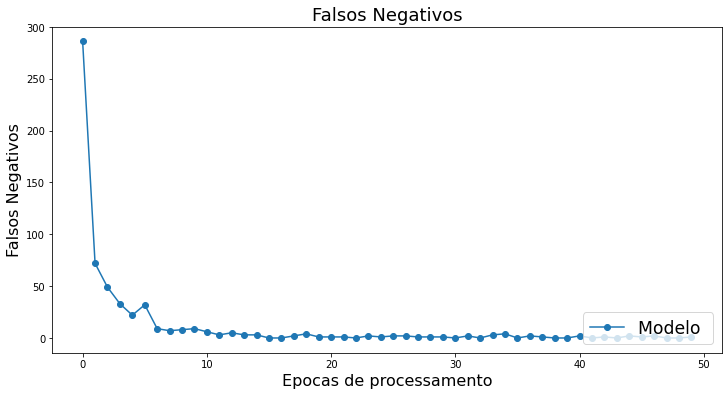

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(fn, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Falsos Negativos', fontsize=16)
plt.title('Falsos Negativos', fontsize=18)
plt.show()

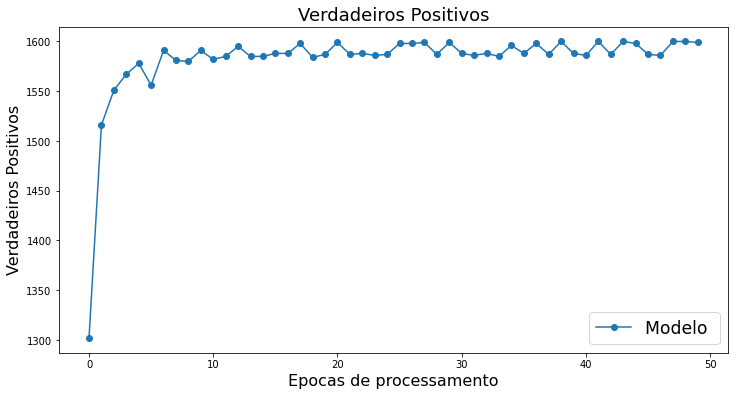

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(tp, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Verdadeiros Positivos', fontsize=16)
plt.title('Verdadeiros Positivos', fontsize=18)
plt.show()

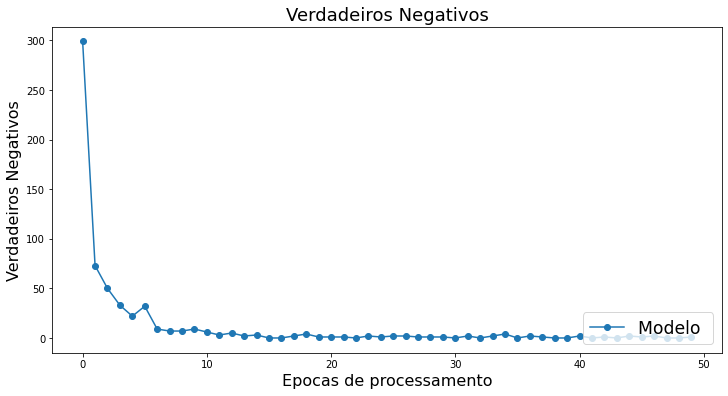

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(fp, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Verdadeiros Negativos', fontsize=16)
plt.title('Verdadeiros Negativos', fontsize=18)
plt.show()

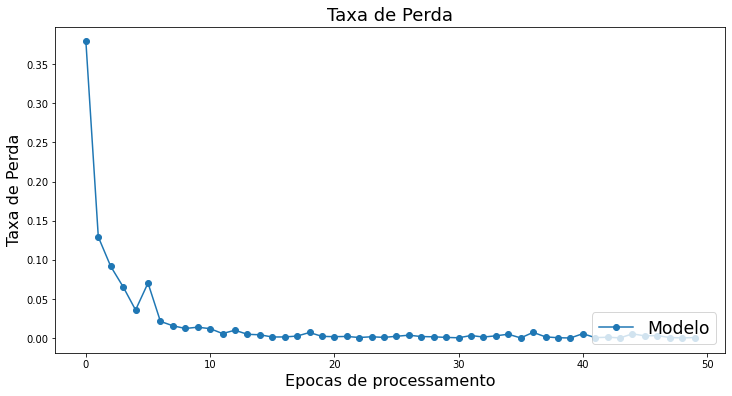

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(loss, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Taxa de Perda', fontsize=16)
plt.title('Taxa de Perda', fontsize=18)
plt.show()

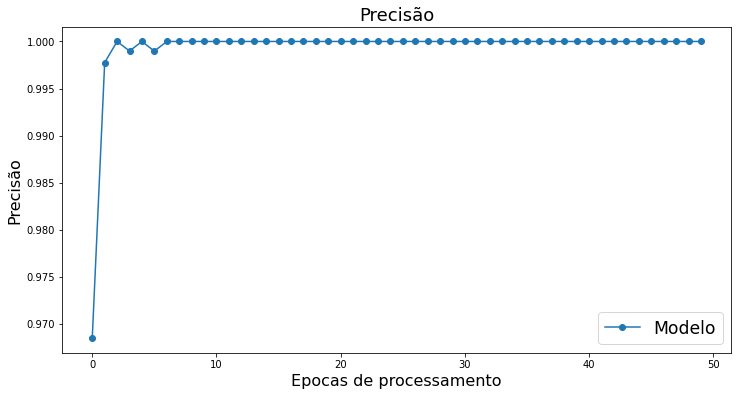

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(pre, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Precisão', fontsize=16)
plt.title('Precisão', fontsize=18)
plt.show()

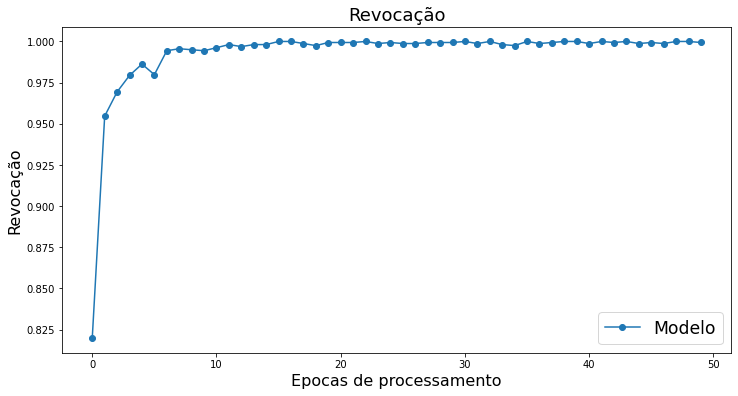

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(rec, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Revocação', fontsize=16)
plt.title('Revocação', fontsize=18)
plt.show()

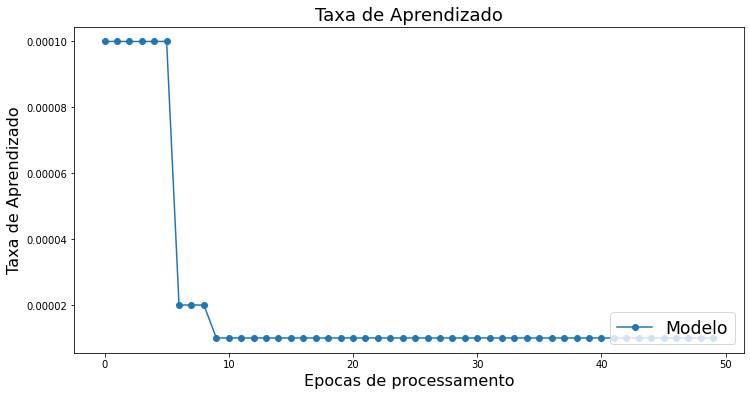

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6.0)
plt.plot(lr, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Taxa de Aprendizado', fontsize=16)
plt.title('Taxa de Aprendizado', fontsize=18)
plt.show()

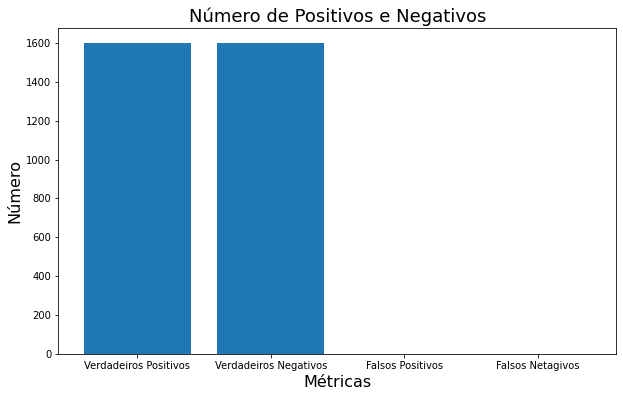

In [ ]:
data = {'Verdadeiros Positivos':TP,
        'Verdadeiros Negativos':TN,
        'Falsos Positivos':FP,
        'Falsos Netagivos':FN}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Número", fontsize=16)
plt.title('Número de Positivos e Negativos', fontsize=18)
plt.show()


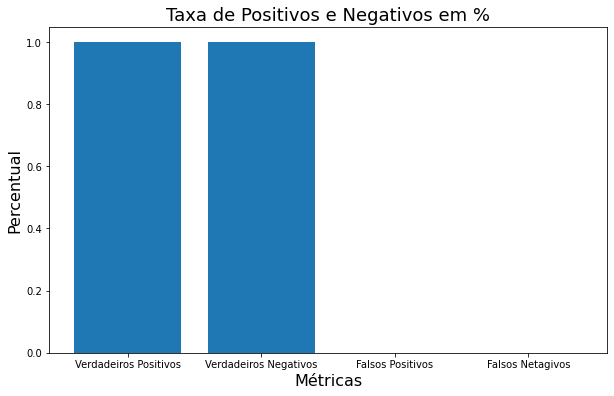

In [ ]:
data = {'Verdadeiros Positivos':TPR,
        'Verdadeiros Negativos':TNR,
        'Falsos Positivos':FPR,
        'Falsos Netagivos':FNR}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Taxa de Positivos e Negativos em %', fontsize=18)
plt.show()


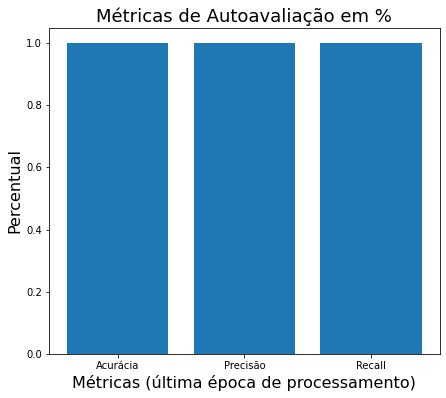

In [ ]:
data = {'Acurácia':ACC,
        'Precisão':PRE,
        'Recall':REC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas (última época de processamento)", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Métricas de Autoavaliação em %', fontsize=18)
plt.show()


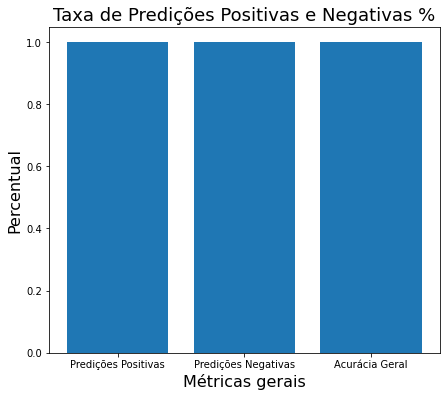

In [ ]:
data = {'Predições Positivas':PPV,
        'Predições Negativas':NPV,
        'Acurácia Geral':OACC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (7, 6))
plt.bar(modelos, valores, width = 0.8)
plt.xlabel("Métricas gerais", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Taxa de Predições Positivas e Negativas %', fontsize=18)
plt.show()


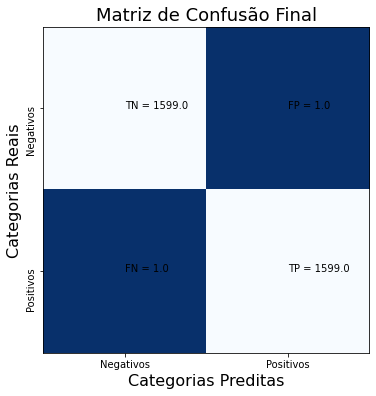

In [ ]:
data = [[TN, FP],[FN,TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão Final', fontsize=18)
plt.ylabel('Categorias Reais', fontsize=16)
plt.xlabel('Categorias Preditas', fontsize=16)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


In [ ]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]


In [ ]:
acc_final = hist.history['accuracy'][-1] * 100


In [ ]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Coeficiente de Correlação de Matthews: {round(MCC, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Taxa de Omissão Falsa: {round(FDR, 2)*100}%') # Percentual do número de amostras ignoradas no teste


RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)
---------------------------------------
Acuracia Final: 97.94%
Acurácia Geral: 98.0%
Acurácia (Média U10): 98.0%
Acurácia (Treinamento): 98.0%
Acurácia (Validação): 98.0%
Taxa de Perda: 0.0%
Taxa de Perda (Validação): 0.04%
Precisão: 100.0%
Precisão (Validação): 98.0%
Recall: 100.0%
Recall (Validação): 98.0%
F1 Score: 100.0%
F-Measure: 100.0%
F1 Score (TP, FP, TN, FN): 98.0%
Taxa de Aprendizado: 9.999999747378752e-06
Sensibilidade: 98.0%
Especificidade: 98.0%
Acurácia da Matriz de Confusão: 98.0%
Coeficiente de Correlação de Matthews: 98.0%
Taxa de Verdadeiros Positivos: 100.0%
Taxa de Verdadeiros Negativos: 100.0%
Taxa de Falsos Positivos: 0.0%
Taxa de Falsos Negativos: 0.0%
Taxa de Omissão Falsa: 0.0%


In [ ]:
print(f'F-Beta: {fb}')


F-Beta: [0.9990431 0.999536 ]


In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_TM2C_weights.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_TM2C.h5')


In [ ]:
import os

model = Sequential()
model = load_model('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_TM2C.h5')
model.load_weights('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_TM2C_weights.h5')


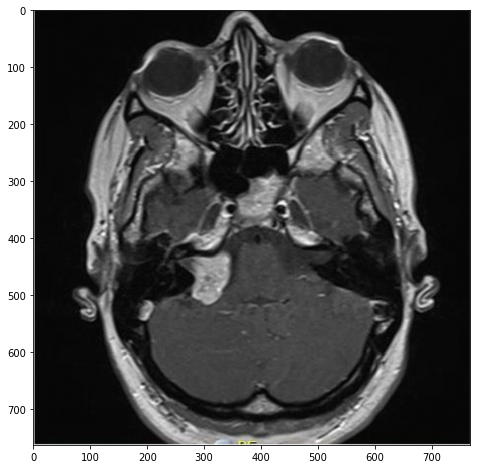

In [ ]:
img_teste = load_img('/content/drive/MyDrive/schwannoma.jpg', target_size = (384, 384))
img_plot = PIL.Image.open('/content/drive/MyDrive/schwannoma.jpg')

plt.figure(figsize=(8,8))
plt.imshow(img_plot)
plt.show()

img_teste = image.img_to_array(img_teste)
img_teste = img_teste / 255
img_teste = np.expand_dims(img_teste, axis = 0)

resultado_teste = model.predict(img_teste)
resultado_final = resultado_teste


In [ ]:
print(resultado_final)


[[3.403620e-04 9.997522e-01]]


In [ ]:
print(f'Com base na diferença de densidade dos tecidos mapeados,')
print(f'a amostra possui características compatíveis com:')
if resultado_final[0,0] > 0.75: print(f'Imagem sem evidência de características patológicas. \nProbabilidade: {round(resultado_final[0,0]*100, 2) - 2}%')
if resultado_final[0,1] > 0.75: print(f'Imagem com características de viés patológico. \nProbabilidade: {round(resultado_final[0,1]*100, 2) - 2}%')


Com base na diferença de densidade dos tecidos mapeados,
a amostra possui características compatíveis com:
Imagem com características de viés patológico. 
Probabilidade: 97.98%
